## DECISION TREE MODEL

#### Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

#### load the dataset from the csv file using pandas

In [2]:
data=pd.read_csv("F:\Project\Credit_card.csv")


#### displaying the data

In [3]:
data

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
5,yes,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,1,1
6,yes,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,1,5
7,yes,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,1,3
8,yes,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,1,6
9,yes,0,28.41667,3.2000,0.019780,52.580000,no,no,0,65,1,18


#### Explore the dataset

In [4]:
# printing the column names
print(data.columns)

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')


In [5]:
# displaying the dimension of dataset
print(data.shape)

(1319, 12)


In [6]:
#describing the numerical attributes
print(data.describe())

           reports          age       income        share  expenditure  \
count  1319.000000  1319.000000  1319.000000  1319.000000  1319.000000   
mean      0.456406    33.213103     3.365376     0.068732   185.057071   
std       1.345267    10.142783     1.693902     0.094656   272.218917   
min       0.000000     0.166667     0.210000     0.000109     0.000000   
25%       0.000000    25.416670     2.243750     0.002316     4.583333   
50%       0.000000    31.250000     2.900000     0.038827   101.298300   
75%       0.000000    39.416670     4.000000     0.093617   249.035800   
max      14.000000    83.500000    13.500000     0.906320  3099.505000   

        dependents       months   majorcards       active  
count  1319.000000  1319.000000  1319.000000  1319.000000  
mean      0.993935    55.267627     0.817286     6.996967  
std       1.247745    66.271746     0.386579     6.305812  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000    12.000000  

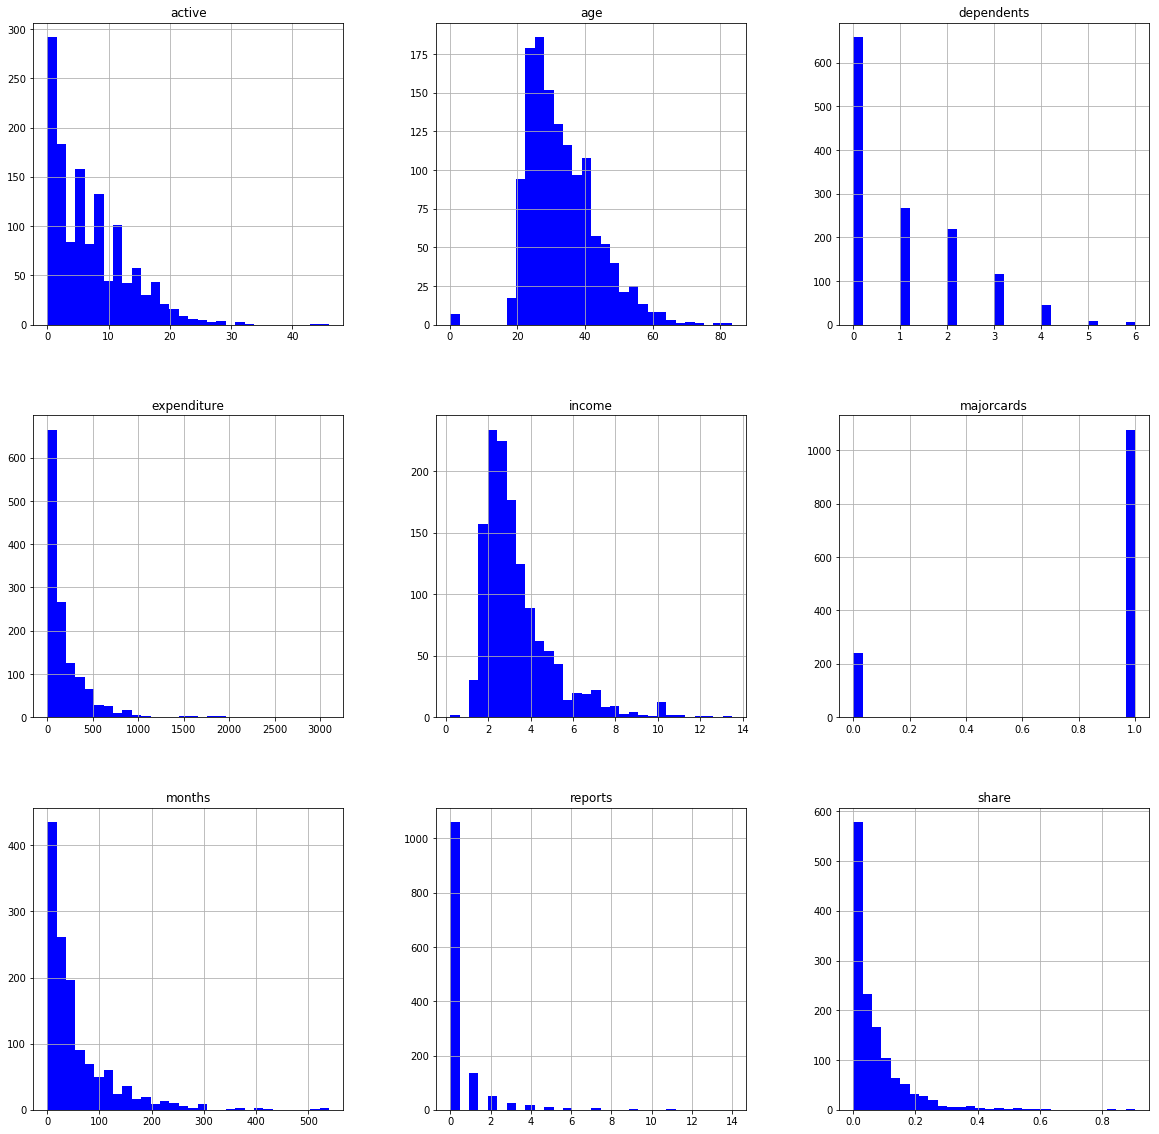

In [7]:
#plot the histogram of each parameter
data.hist(color='blue',bins=30,figsize=(20,20))
plt.show()

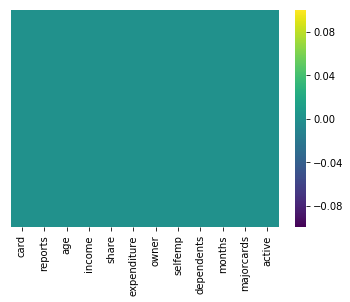

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')
#no null values exists in any of the attributes

In [9]:
#displaying the dataset
data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [10]:
# replacing category to numerical value
data.card.replace(['yes','no'], ['1', '0'], inplace=True)
data.owner.replace(['yes','no'], ['1', '0'], inplace=True)
data.selfemp.replace(['yes','no'], ['1', '0'], inplace=True)
data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


In [11]:
# Count Target Variable Values
data.card.value_counts()


1    1023
0     296
Name: card, dtype: int64

In [12]:
# count target variable percentage
round(data.card.value_counts()*100/len(data.axes[0]),2)

1    77.56
0    22.44
Name: card, dtype: float64

#### selecting the feature attributes

In [13]:
X=data[["reports","expenditure","age","income"]]
y=data["card"]

In [14]:
X.head()

,reports,expenditure,age,income
0,0,124.983300,37.66667,4.5200
1,0,9.854167,33.25000,2.4200
2,0,15.000000,33.66667,4.5000
3,0,137.869200,30.50000,2.5400
4,0,546.503300,32.16667,9.7867


In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: card, dtype: object

#### splitting the train and test set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [18]:
#length of train set
len(X_train)

923

In [19]:
#length of test set
len(X_test)

396

In [20]:
# displaying train set
X_train.head()

,reports,expenditure,age,income
831,0,105.32500,39.91667,4.60
1239,0,0.00000,53.00000,11.00
280,0,80.45084,29.83333,2.80
82,0,108.60750,19.58333,1.65
1117,0,128.07250,22.91667,1.56


In [21]:
# displaying test set
X_test.head()

,reports,expenditure,age,income
56,0,1898.03300,34.33333,4.800
711,0,20.33333,36.41667,2.200
912,0,0.00000,29.33333,3.500
1053,1,0.00000,28.50000,2.000
1142,1,0.00000,20.91667,2.625


In [22]:
 #Load library
#from sklearn import tree

# Building Decision Tree - CART Algorithm (gini criteria)
dt_train_gini_decision = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)
# Train
dt_train_gini_decision.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [23]:
from sklearn import tree
with open("dt_train_gini_decision.txt", "w") as f:
    f = tree.export_graphviz(dt_train_gini_decision, out_file=f)

In [24]:
#apply the classifier we trained to the test data(which,remember,it has never seen before)
dt_train_gini_decision.predict(X_test) #test matching
#pssing x and getting y in predict func

array(['1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0',
       '1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1',
       '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0',
       '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '0',
       '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1',
       '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '0',
       '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1',
       '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0',
       '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1',
       '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1',
       '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1

In [25]:
#my calssifier is trained now 
#predict the probability of 1st 10 obs
dt_train_gini_decision.predict_proba(X_test)[0:10]

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.55555556, 0.44444444],
       [0.91666667, 0.08333333],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [26]:
# displaying the predicted value for test set
preds= dt_train_gini_decision.predict(X_test)
preds[0:10]

array(['1', '1', '0', '0', '0', '0', '0', '0', '1', '1'], dtype=object)

In [27]:
#displaying the actual value of test set
y_test.head(10)

56      1
711     1
912     0
1053    0
1142    0
305     0
461     0
1243    0
582     1
963     1
Name: card, dtype: object

##### creating a confusion matrix

In [28]:
pd.crosstab(y_test,preds,rownames=["Actual result"],colnames=["Predicted result"])

Predicted result,0,1
Actual result,,
0,87,0
1,8,301


In [29]:
#view a list of the features and theirv imoportant score
list(zip(X_train,dt_train_gini_decision.feature_importances_))
#which attributes are more  decisive...used in overfitting to drop columns


[('reports', 0.004721763304312109),
 ('expenditure', 0.9783798350814344),
 ('age', 0.010235979525498706),
 ('income', 0.0066624220887548545)]

In [30]:
eff=dt_train_gini_decision.score(X_test,y_test)

In [31]:
print(eff*100)

97.97979797979798


##This step create a text file dt_train_gini.txt in the default folder. We can give full path as well. We can copy the context of this text file and put into the box on http://www.webgraphviz.com/